## Todo
- chunk them out by 30 seconds to bootstrap and create more samples
- try some cross validation 
- test for overfitting
- more features 
    - get time signature from meta messages
    - ~~stdev of velocity (instead of just average)~~
    - create some manual cross variables with timing and key and time sig
    - frequency domain features

## Initial Imports and Paths

In [1]:
from composer_class_funcs import *

In [2]:
# ml packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

In [3]:
# file paths
train_midi_path = "./Challenge_DataSet/PS1/"
test_midi_path = "./Challenge_DataSet/PS2/"

## Data Collection and Processing

In [4]:
file_path_ps2 = test_midi_path+"0.981087291054314_adj.mid"
file_path_ps1 = train_midi_path+"Bach/Cello Suite 3_BWV1009_2217_cs3-1pre.mid"
x = extract_features_from_midi(file_path_ps2)

In [5]:
# import file
midi = mido.MidiFile(file_path_ps2)

In [6]:
os.path.basename(midi.filename)

'0.981087291054314_adj.mid'

In [7]:
features, labels = load_dataset(train_midi_path, labeled=True)
df_labeled = create_dataframe(features, labels)

In [8]:
unlabeled_features = load_dataset(test_midi_path, labeled=False)
df_unlabeled=create_dataframe(unlabeled_features)

In [9]:
numeric_columns = df_labeled.select_dtypes(include=['float64', 'int64']).columns

## EDA

In [10]:
df_labeled.head()

,filename,type,tpb,key,average_velocity,variance_velocity,Note_0,Note_1,Note_2,Note_3,...,Note_119,Note_120,Note_121,Note_122,Note_123,Note_124,Note_125,Note_126,Note_127,composer
0,Piano Sonata No 20 in C minor_OP111_2532_ps32_...,1,384,Cm,96.794118,221.114475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beethoven
1,Piano Sonata No 17 in D minor_OP31NO2_2391_ps1...,1,384,Dm,90.946108,185.440209,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beethoven
2,Piano Sonata No 18 in E-flat major_OP31NO3_259...,1,384,Eb,80.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beethoven
3,Piano Sonata No 26 in E-flat major_OP81NO1_260...,1,384,Cm,80.232558,3.821886,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beethoven
4,Piano Sonata No 10 in G major_OP14NO2_2678_ps1...,1,384,G,80.692884,11.074219,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beethoven


In [11]:
df_unlabeled.head()

,filename,type,tpb,key,average_velocity,variance_velocity,Note_0,Note_1,Note_2,Note_3,...,Note_118,Note_119,Note_120,Note_121,Note_122,Note_123,Note_124,Note_125,Note_126,Note_127
0,0.8014751784512073_adj.mid,1,192,F,75.930435,187.082117,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.981087291054314_adj.mid,1,96,Eb,69.800000,22.589630,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5807329043589801_adj.mid,1,120,C,53.905128,598.783307,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.23120017256495873_adj.mid,1,384,A,76.966667,261.510000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.033313986422223163_adj.mid,1,384,Bm,100.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Display basic information about the DataFrame
print("\nBasic Information about the DataFrame:")
print(df_labeled.info())

# Generate summary statistics
print("\nSummary Statistics of the DataFrame:")
print(df_labeled.describe())

# Check for missing values
print("\nMissing Values in the DataFrame:")
print(df_labeled.isnull().sum())


Basic Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 135 entries, filename to composer
dtypes: float64(130), int64(2), object(3)
memory usage: 204.7+ KB
None

Summary Statistics of the DataFrame:
        type          tpb  average_velocity  variance_velocity  Note_0  \
count  194.0   194.000000        194.000000         194.000000   194.0   
mean     1.0   349.567010         78.222697         141.482716     0.0   
std      0.0   129.871112         14.951558         155.415359     0.0   
min      1.0   120.000000         36.000000           0.000000     0.0   
25%      1.0   384.000000         68.503012          13.084227     0.0   
50%      1.0   384.000000         80.207583          96.446415     0.0   
75%      1.0   384.000000         86.954459         208.863667     0.0   
max      1.0  1024.000000        127.000000         793.444444     0.0   

       Note_1  Note_2  Note_3  Note_4  Note_5  ...  Note_118  Note_11

In [13]:
# confirm they're all type 1: 
## https://mido.readthedocs.io/en/latest/files/midi.html#file-types
## type 1 (synchronous): all tracks start at the same time
print(df_labeled.type.value_counts())
print(df_unlabeled.type.value_counts())

type
1    194
Name: count, dtype: int64
type
1    35
Name: count, dtype: int64


In [14]:
df_labeled.key.value_counts()

key
Eb     28
C      28
       16
F      14
Bb     14
E      13
Ab     13
G      11
D      10
A      10
Cm      8
Fm      6
Dm      4
Em      4
Bm      3
Gm      3
Db      2
Am      1
F#m     1
C#m     1
F#      1
Bbm     1
Abm     1
Gb      1
Name: count, dtype: int64

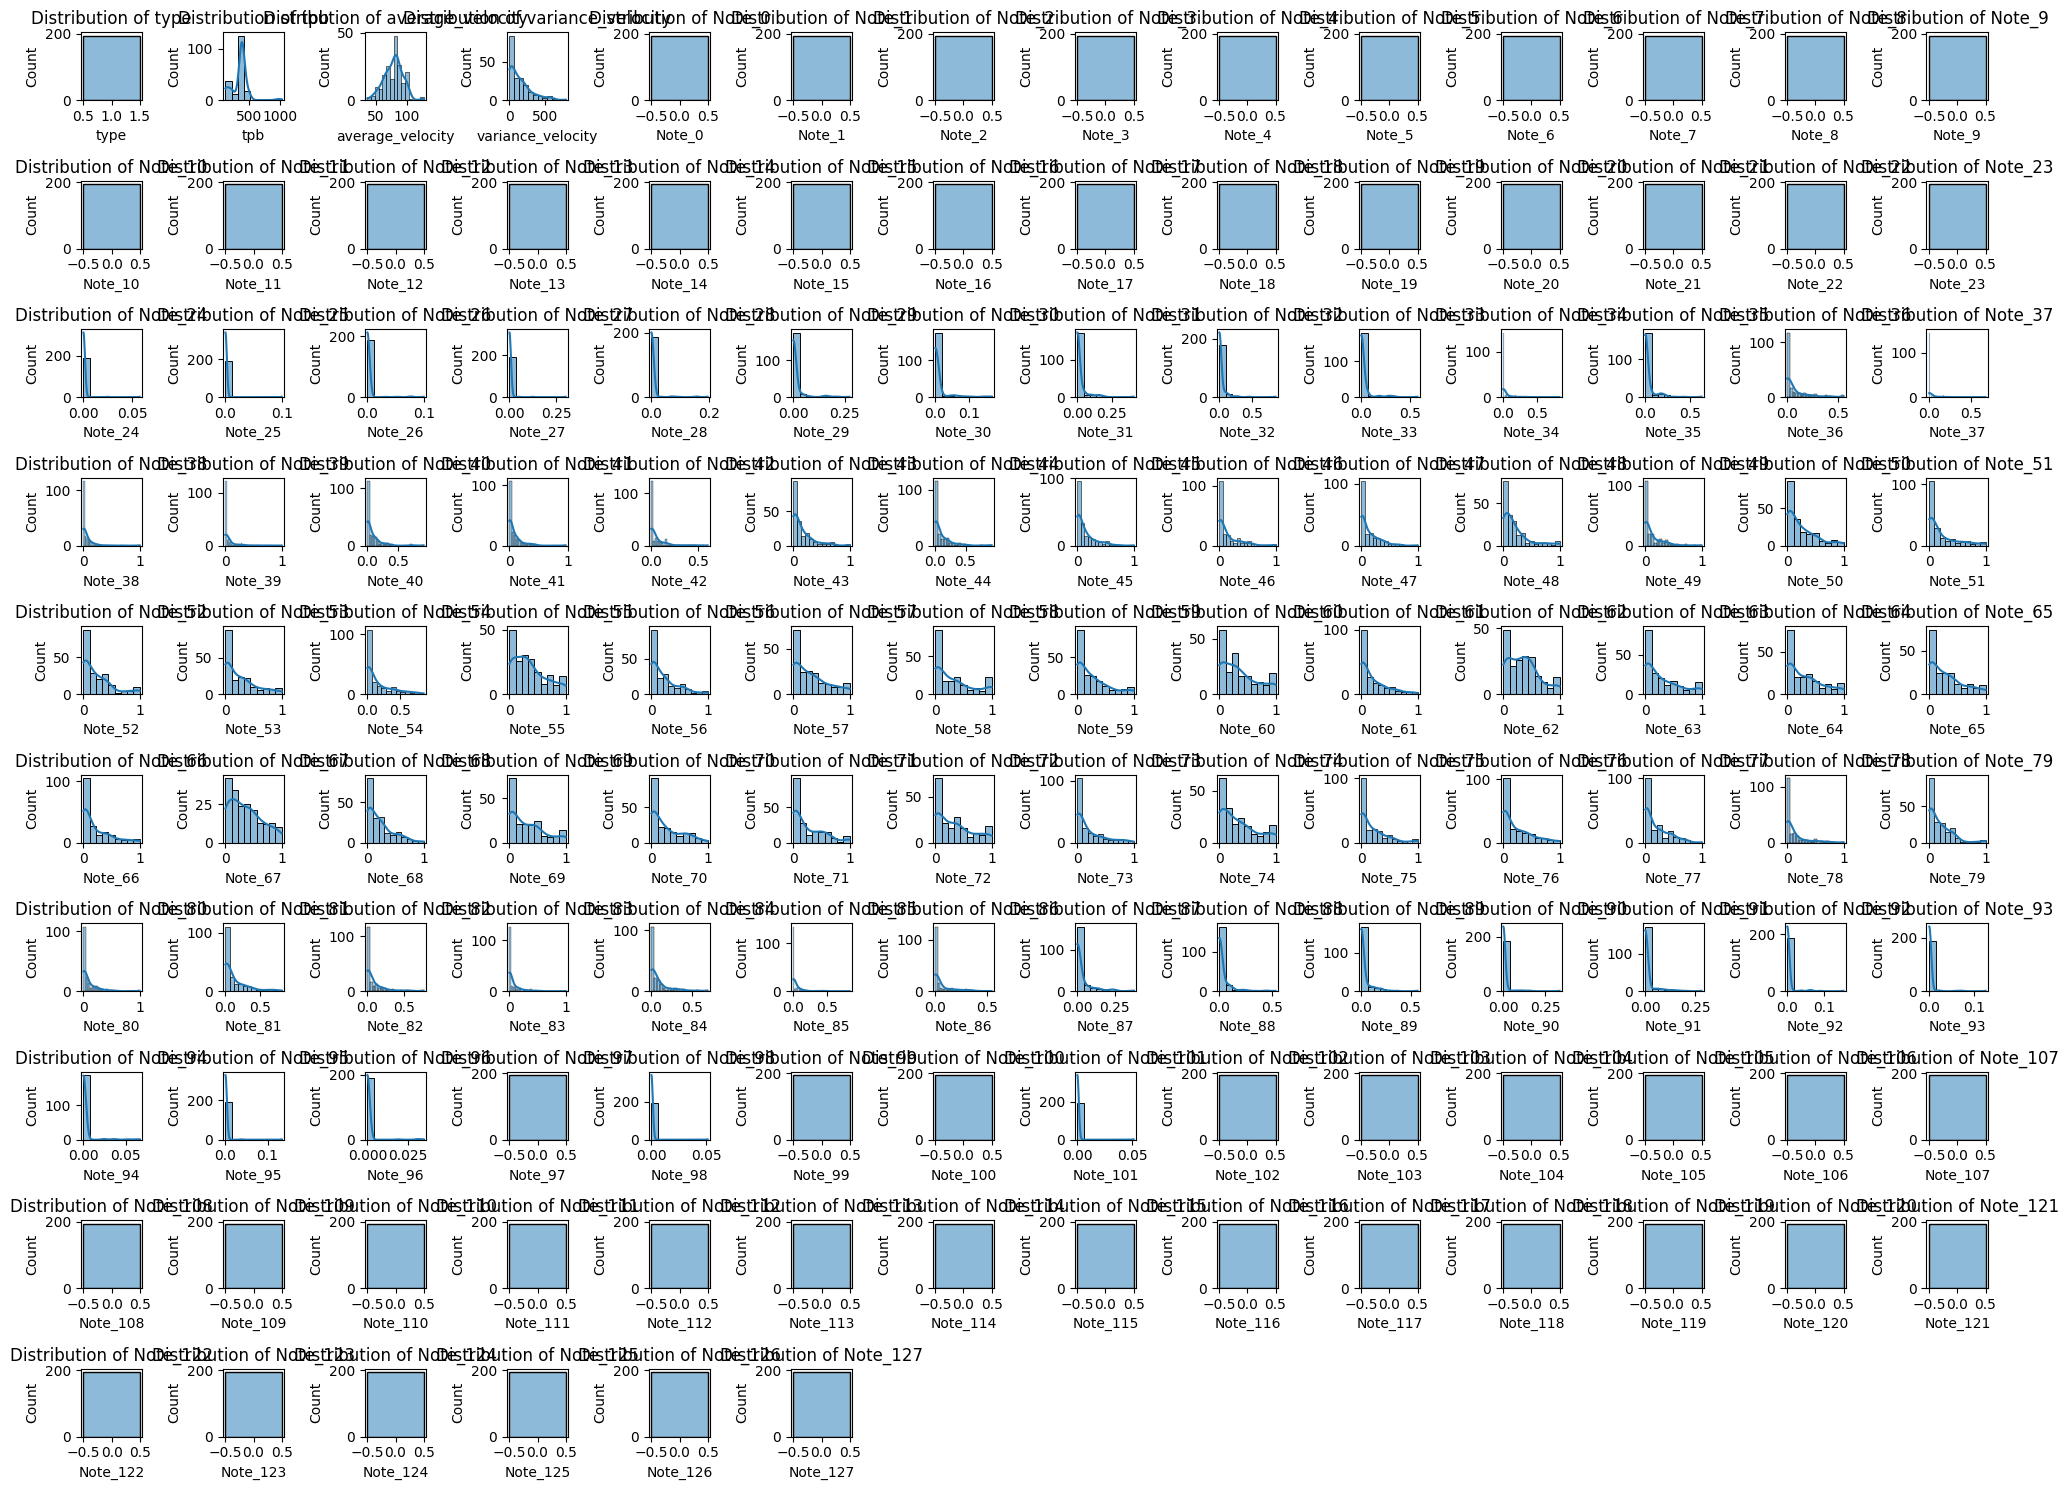

In [15]:
# Visualize the distribution of each numeric feature
# numeric_columns = df_labeled.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(10, 14, i+1)
    sns.histplot(df_labeled[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

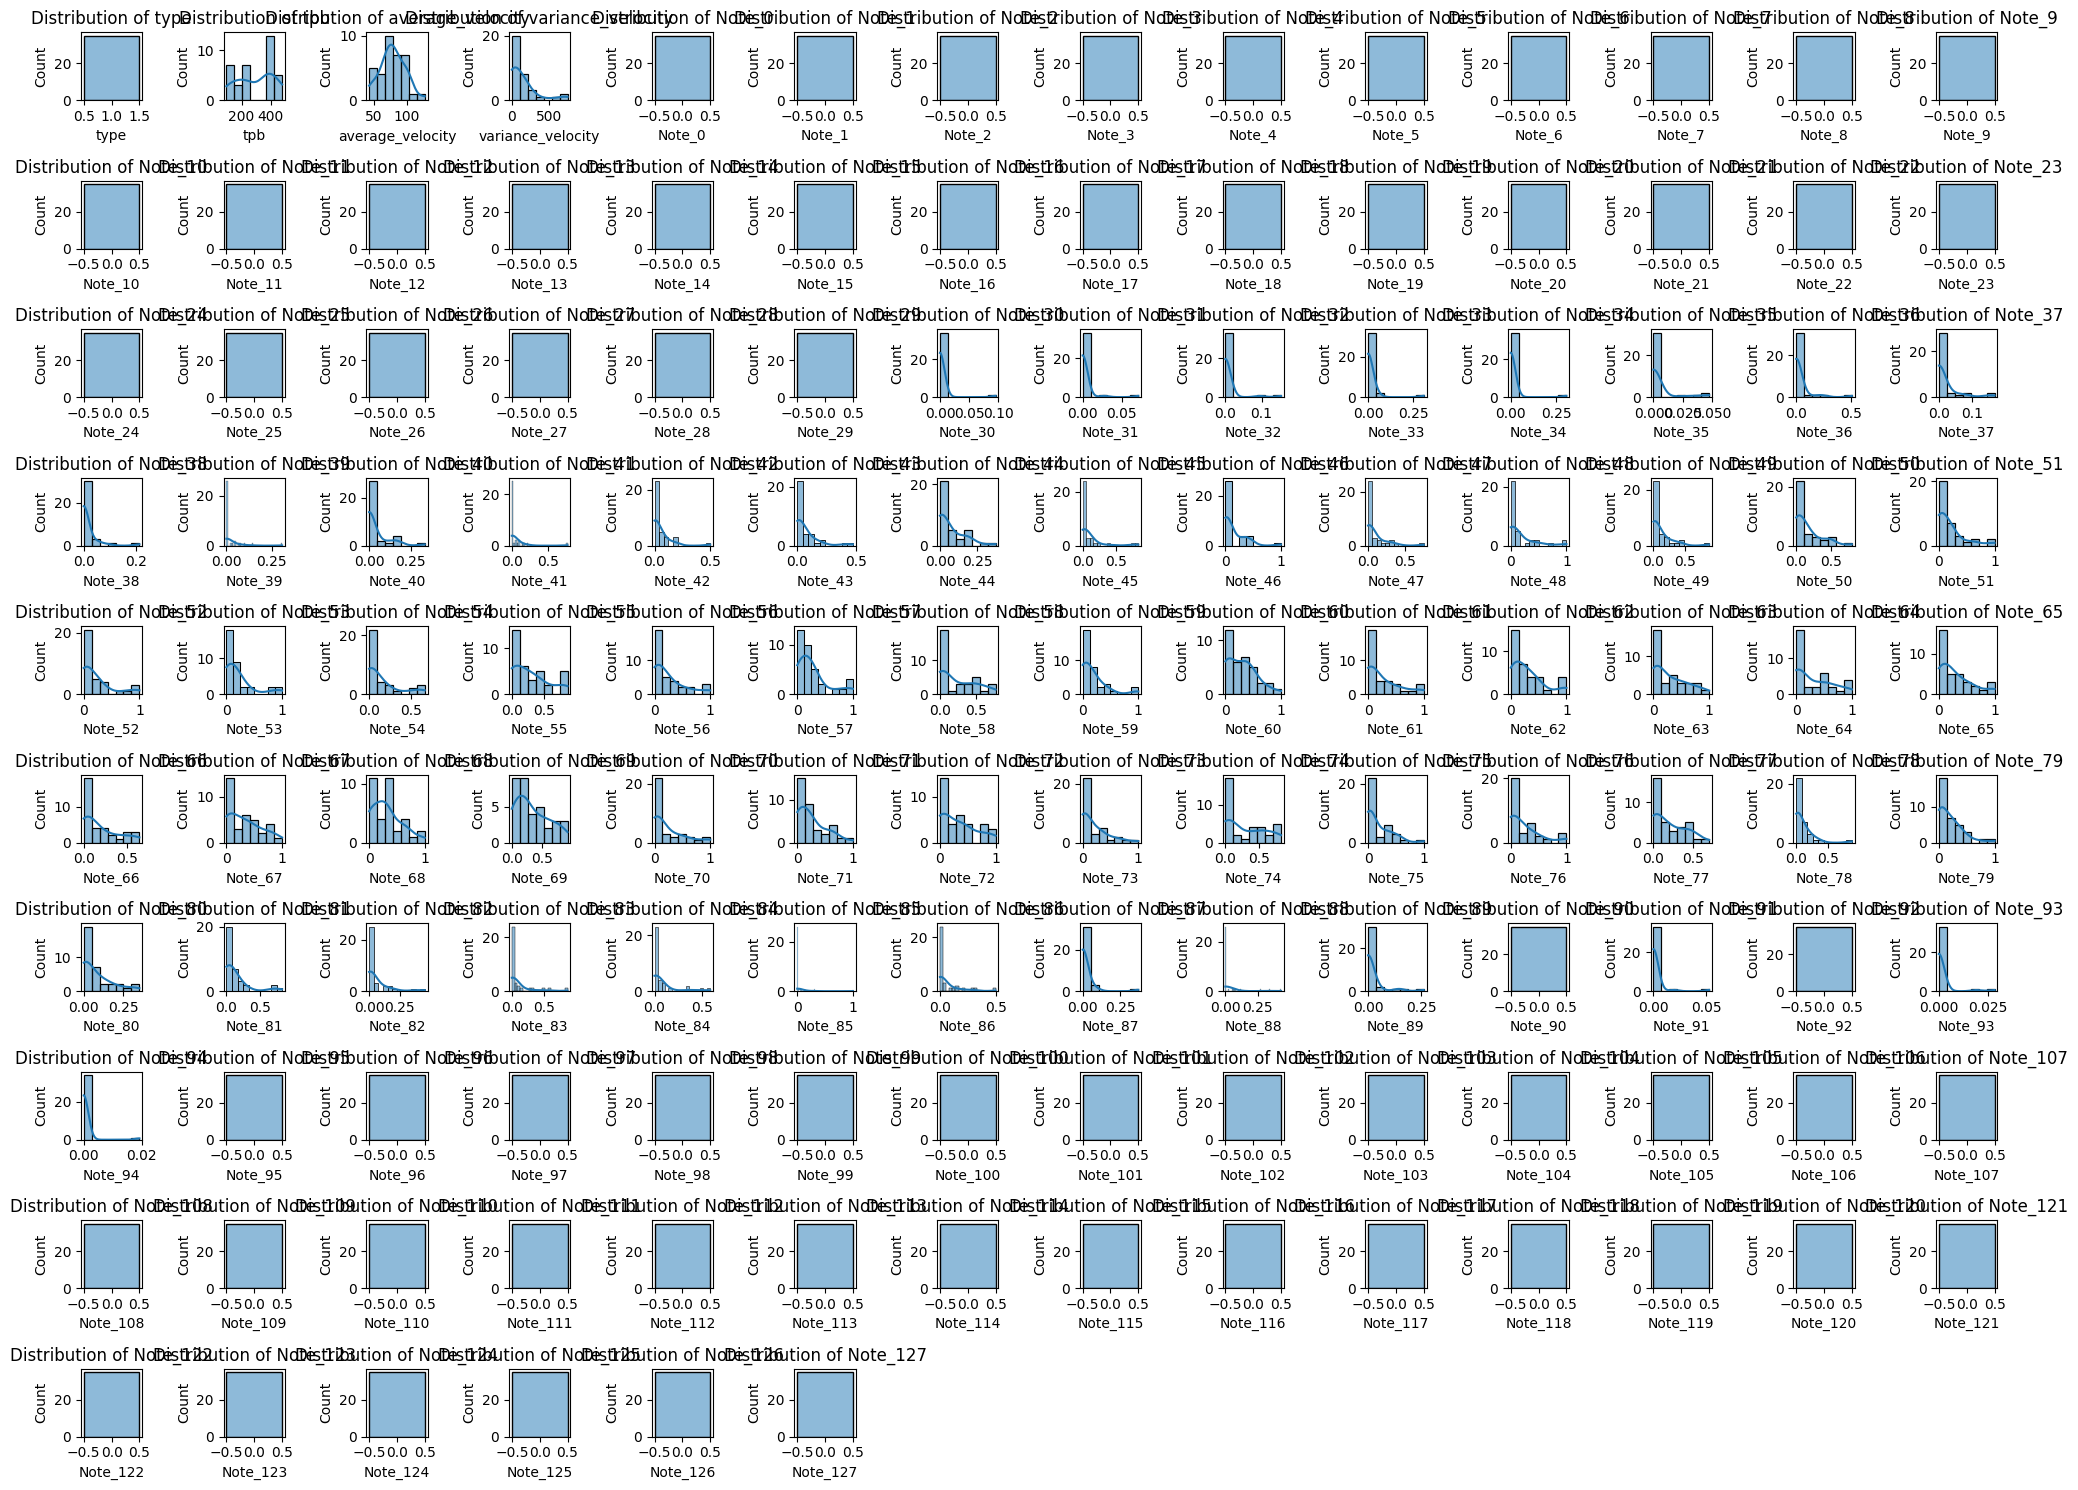

In [16]:
# Visualize the distribution of each numeric feature
# numeric_columns = df_unlabeled.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(10, 14, i+1)
    sns.histplot(df_unlabeled[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

based on this, I'd remove notes 0-22, 105-127.
The unlabeled dataset also has no info for these notes.
See feature engineering and prep section for removal

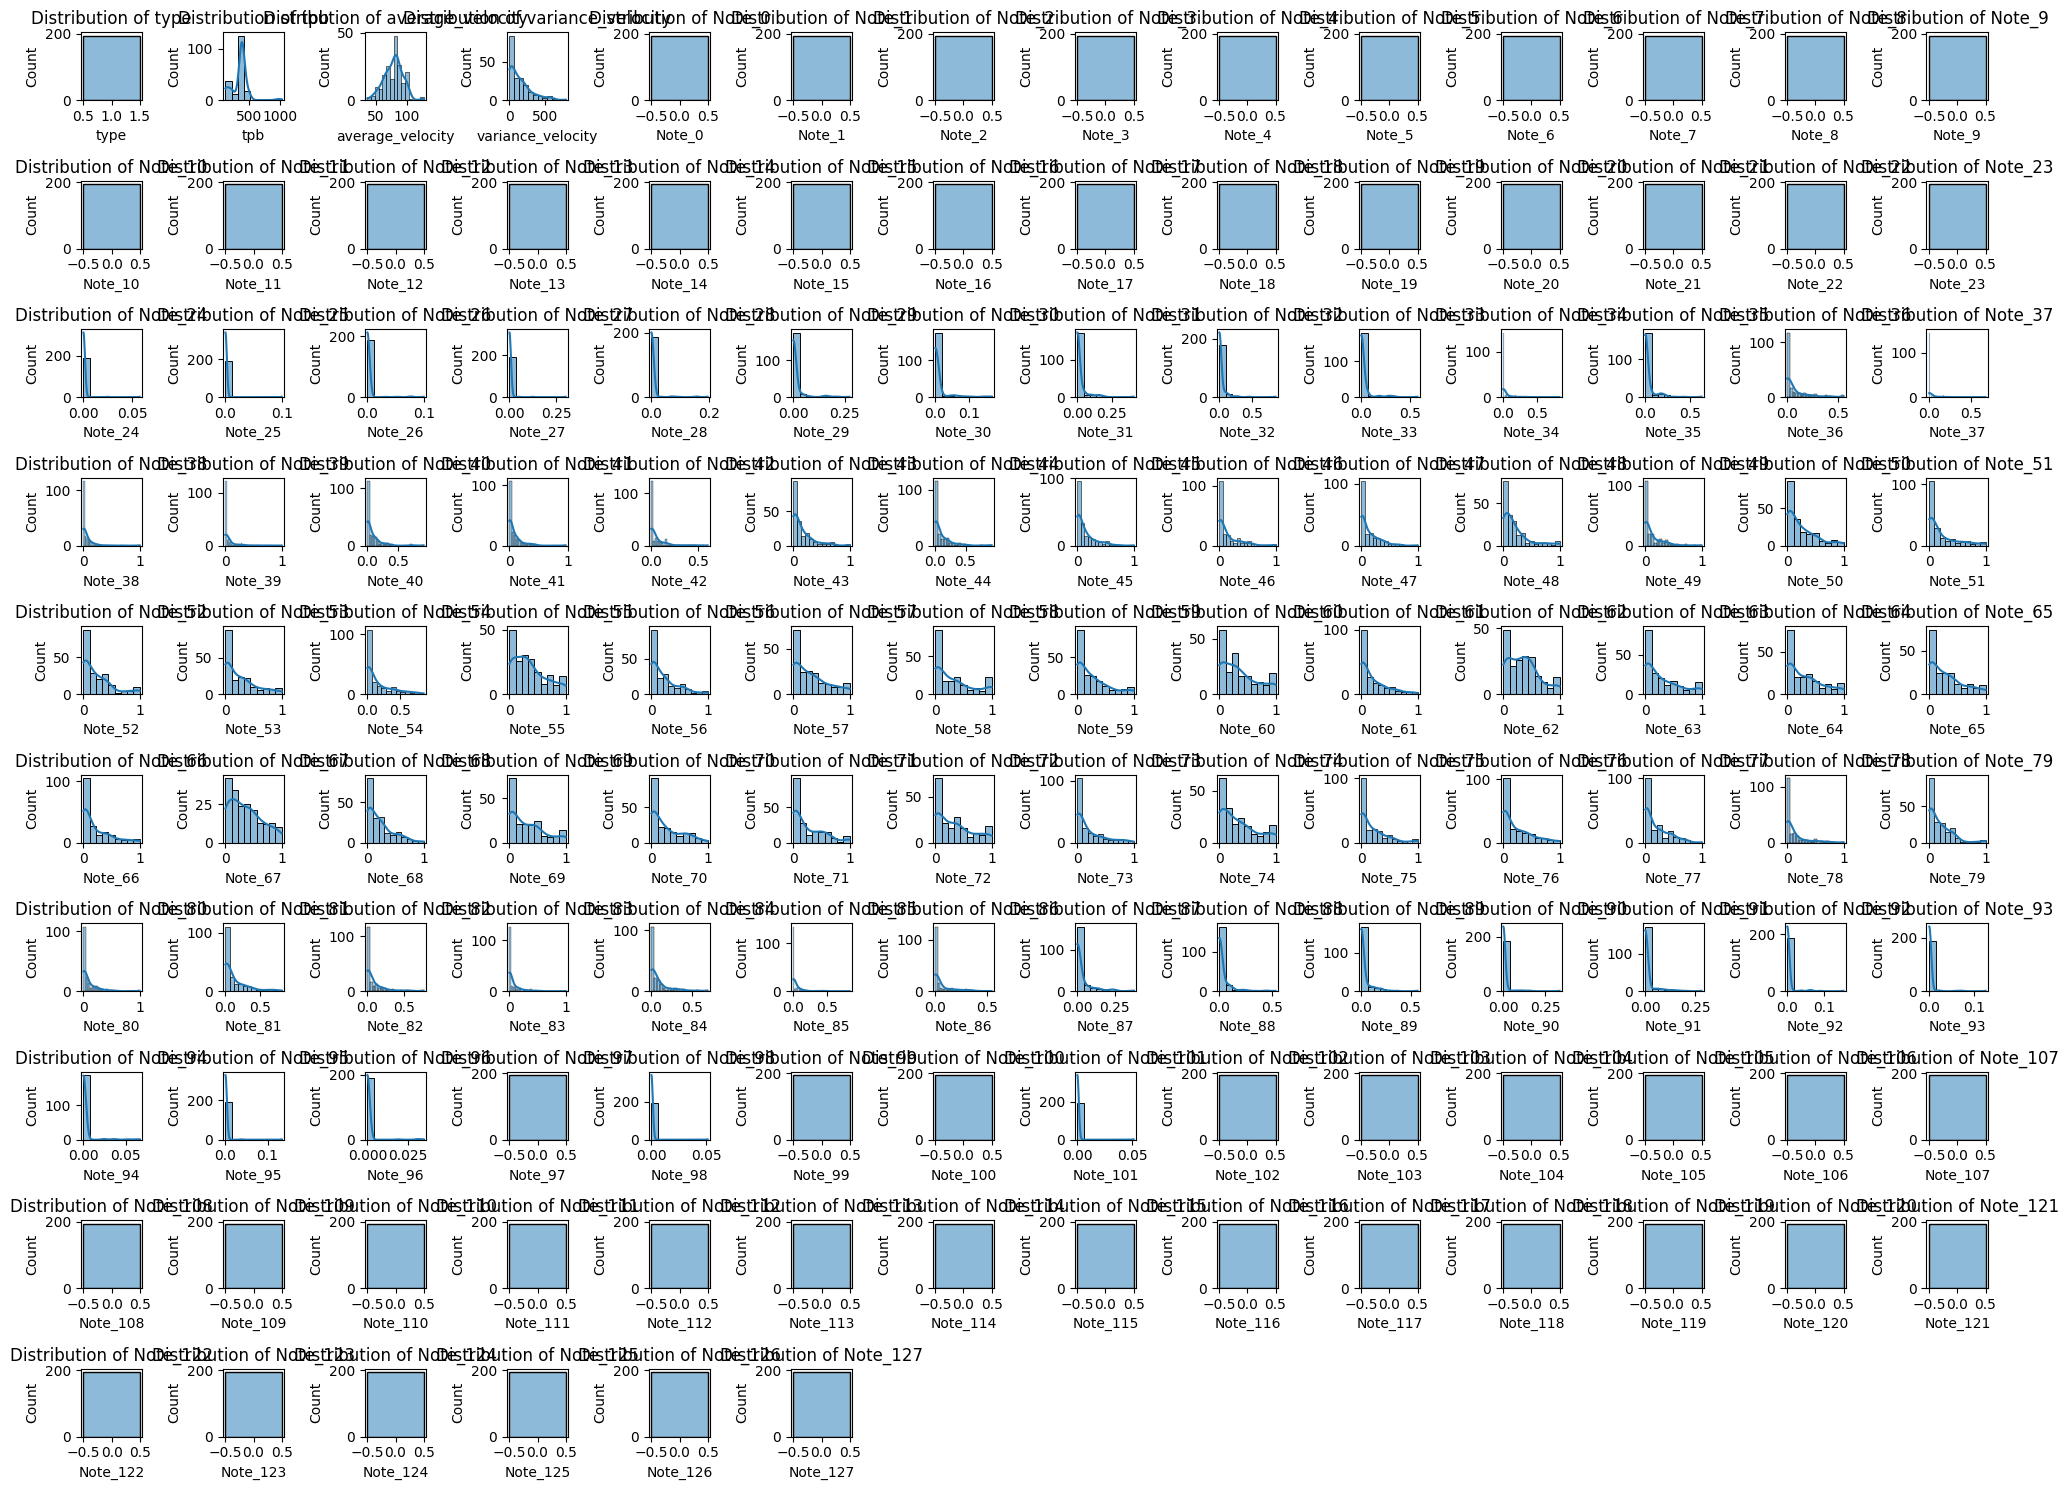

In [17]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(10, 14, i+1)
    sns.histplot(df_labeled[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

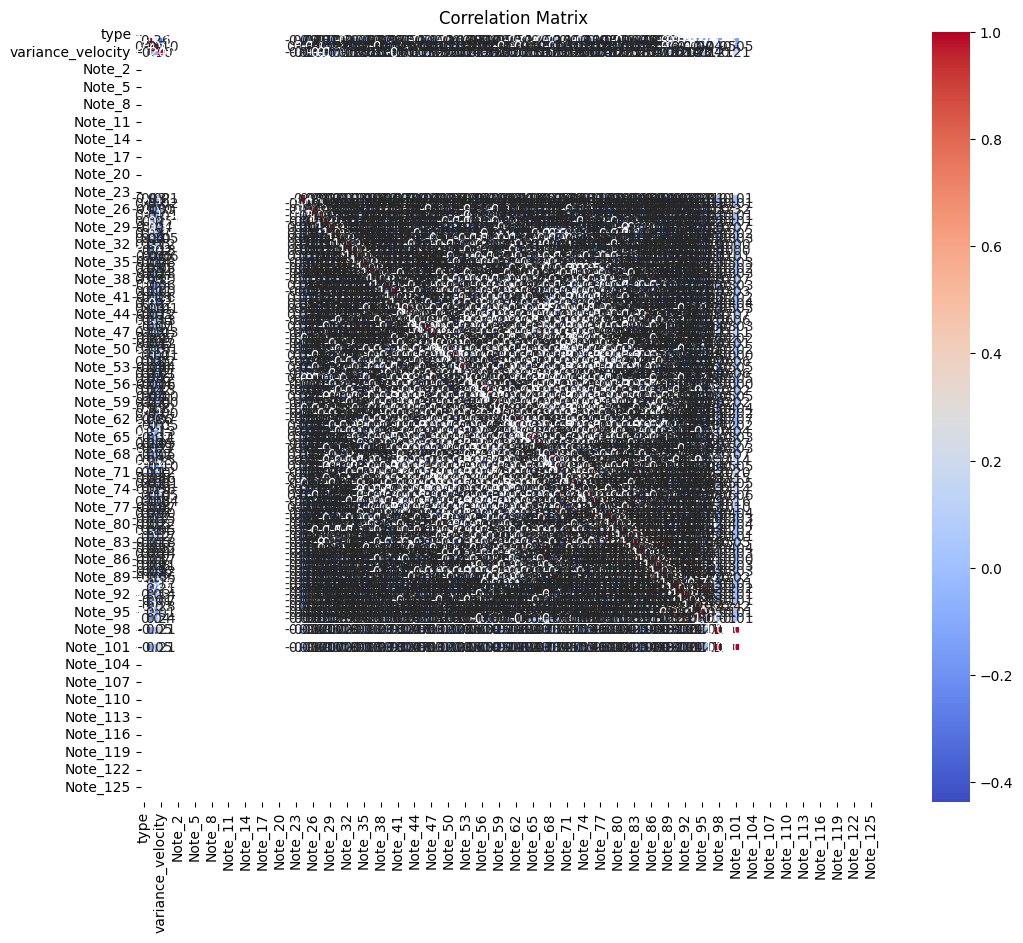

In [18]:
# Visualize correlations between numeric features
plt.figure(figsize=(12, 10))
correlation_matrix = df_labeled[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [19]:
numeric_columns

Index(['type', 'tpb', 'average_velocity', 'variance_velocity', 'Note_0',
       'Note_1', 'Note_2', 'Note_3', 'Note_4', 'Note_5',
       ...
       'Note_118', 'Note_119', 'Note_120', 'Note_121', 'Note_122', 'Note_123',
       'Note_124', 'Note_125', 'Note_126', 'Note_127'],
      dtype='object', length=132)

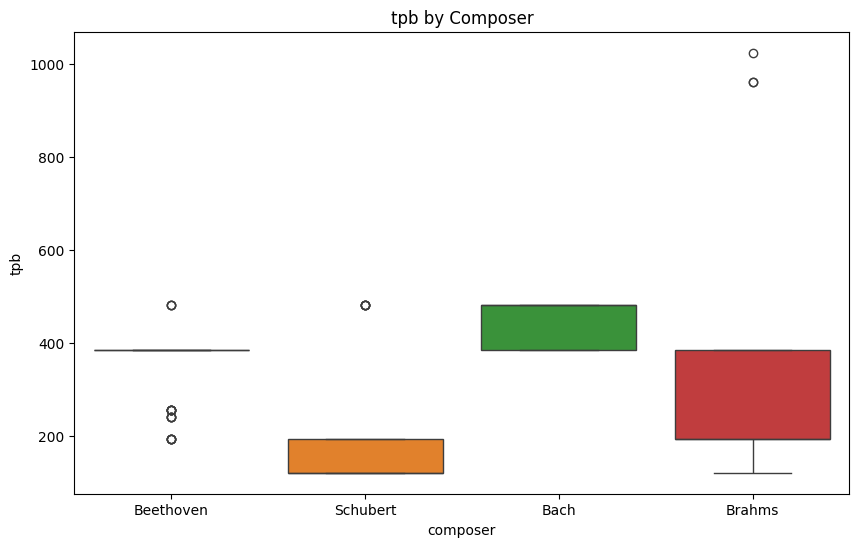

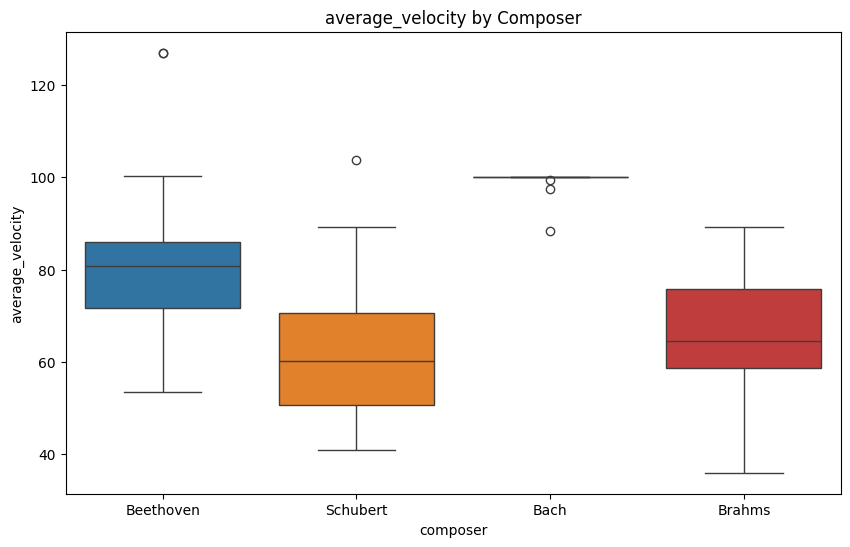

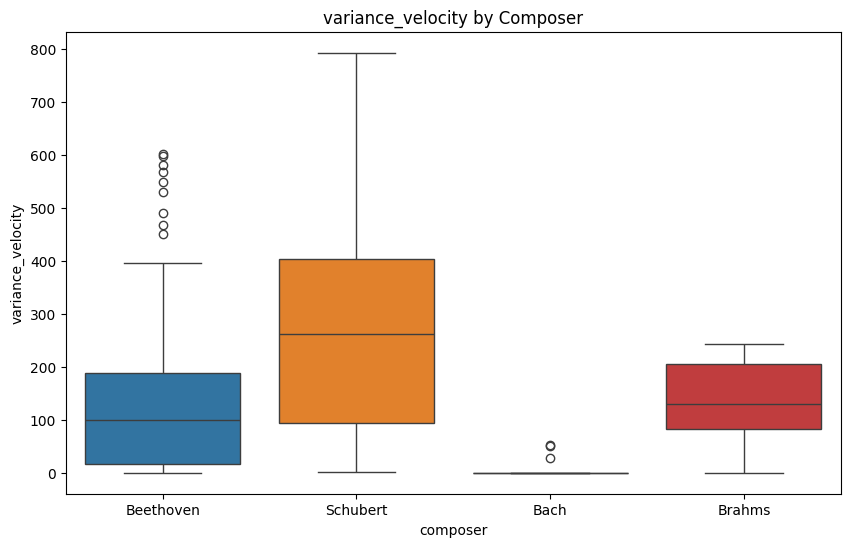

In [20]:
# Visualize the relationship between the first two numeric features and the target (if applicable)
if 'composer' in df_labeled.columns:
    for i in range(1,4):
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='composer', y=numeric_columns[i], data=df_labeled, hue='composer')
        plt.title(f'{numeric_columns[i]} by Composer')
        plt.show()

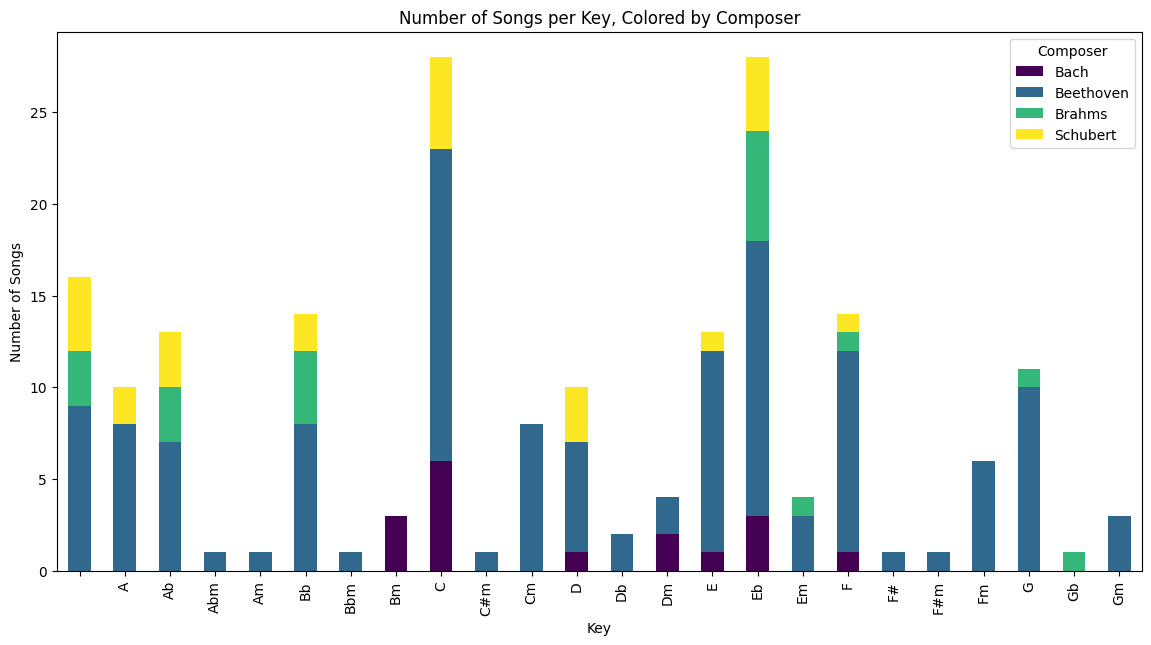

In [21]:
# Prepare the data for the stacked bar chart
key_composer_counts = df_labeled.groupby(['key', 'composer']).size().unstack(fill_value=0)
# Plot the stacked bar chart
key_composer_counts.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Number of Songs per Key, Colored by Composer')
plt.xlabel('Key')
plt.ylabel('Number of Songs')
plt.xticks(rotation=90)
plt.legend(title='Composer')
plt.show()

## Clean + Feature engineer

In [22]:
# Drop columns corresponding to notes 0-22 and 105-127
cols_to_drop = [f'Note_{i}' for i in list(range(0, 23)) + list(range(105, 128))]
df_labeled.drop(columns=cols_to_drop, inplace=True)
df_unlabeled.drop(columns=cols_to_drop, inplace=True)

In [23]:
# replace Null keys with 'unk' value
df_labeled['key']=df_labeled['key'].fillna('unk')
df_unlabeled['key']=df_unlabeled['key'].fillna('unk')

# Encode the 'key' variable
label_encoder_key = LabelEncoder()
df_labeled['key_encoded'] = label_encoder_key.fit_transform(df_labeled['key'])
df_unlabeled['key_encoded'] = label_encoder_key.transform(df_unlabeled['key']) # only transform to use the same encoding as labeled

# Encode the 'Composer' column
label_encoder_composer = LabelEncoder()
df_labeled['composer'] = label_encoder_composer.fit_transform(df_labeled['composer'])

In [24]:
# Define the features (X) and target (y)
X = df_labeled.drop(columns=['composer', 'filename','key'])
y = df_labeled['composer']

# Define features for unlabeled data
z = df_unlabeled.drop(columns=['filename','key'])

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [26]:
print(label_encoder_composer.classes_,'\n')
print('train targets\n',y_train.value_counts())
print('\ntest targets\n',y_test.value_counts())

['Bach' 'Beethoven' 'Brahms' 'Schubert'] 

train targets
 composer
1    77
3    16
2    15
0     8
Name: count, dtype: int64

test targets
 composer
1    55
3     9
0     9
2     5
Name: count, dtype: int64


## Train Classifiers

### Logistic Regression

In [27]:
# Train and evaluate the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
# Get the classification probabilities for each class
y_proba_lr = log_reg.predict_proba(X_test)

/Users/bartmasters/code/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/bartmasters/code/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bartmasters/code/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bartmasters/code/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Logistic Regression :
Accuracy Score: 0.8974358974358975

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.92      0.98      0.95        55
           2       0.00      0.00      0.00         5
           3       0.78      0.78      0.78         9

    accuracy                           0.90        78
   macro avg       0.65      0.69      0.67        78
weighted avg       0.84      0.90      0.87        78



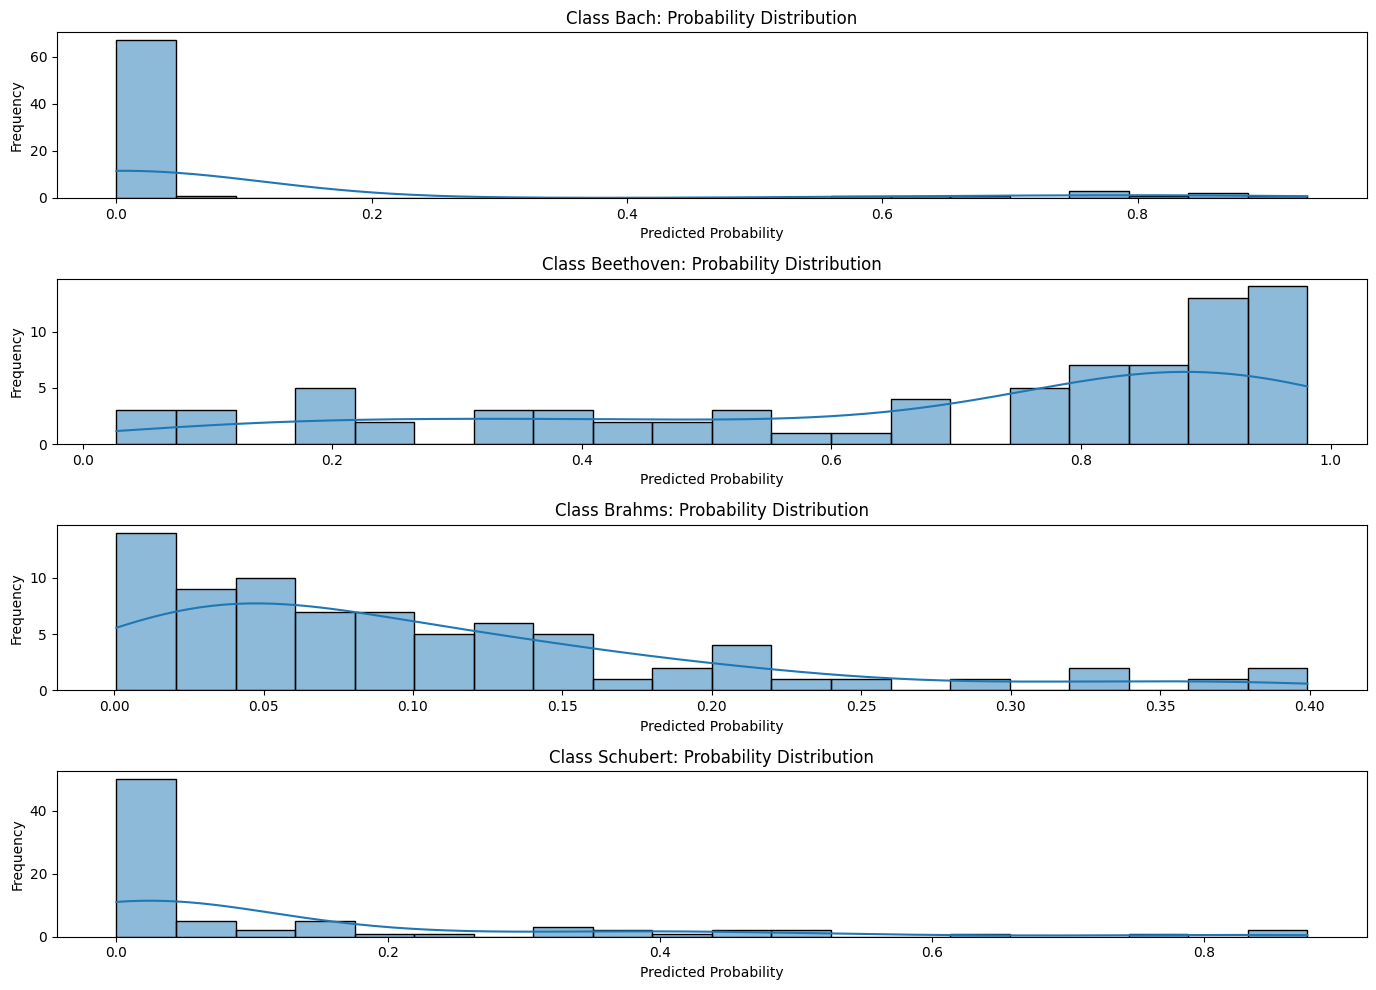

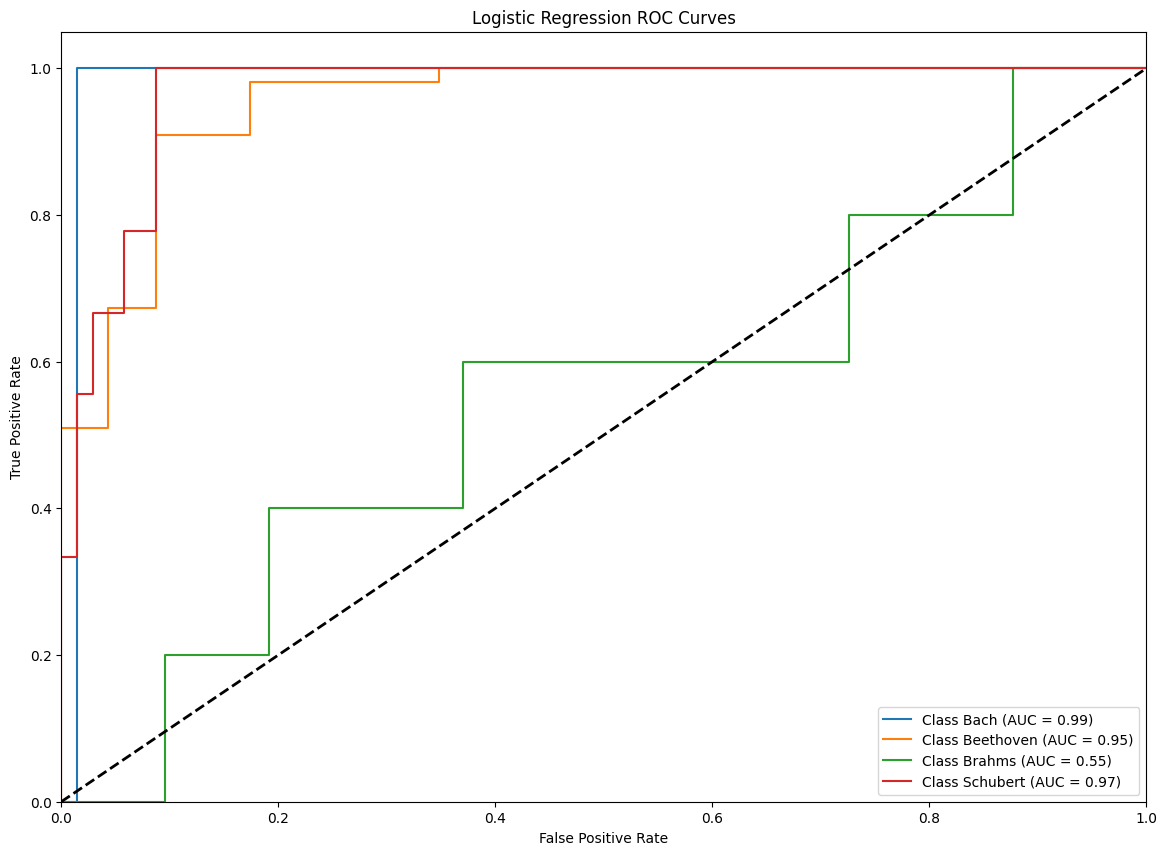

In [28]:
model_eval("Logistic Regression", y_test, y_pred_lr, y_proba_lr, label_encoder_composer)

### SVM

In [29]:
# Build and train the Random Forest classifier
svm_classifier = LinearSVC(penalty='l2', random_state=0, tol=1e-5)
# Wrap the LinearSVC classifier with CalibratedClassifierCV to obtain probabilities
calibrated_svc = CalibratedClassifierCV(estimator=svm_classifier, method='sigmoid')
calibrated_svc.fit(X_train, y_train)
# Predict the target on the test set
y_pred_svc = calibrated_svc.predict(X_test)
# Get the classification probabilities for each class
y_proba_svc = calibrated_svc.predict_proba(X_test)

Support Vector Machine (CV Calibrated) :
Accuracy Score: 0.7051282051282052

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.71      1.00      0.83        55
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         9

    accuracy                           0.71        78
   macro avg       0.18      0.25      0.21        78
weighted avg       0.50      0.71      0.58        78



/Users/bartmasters/code/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bartmasters/code/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bartmasters/code/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

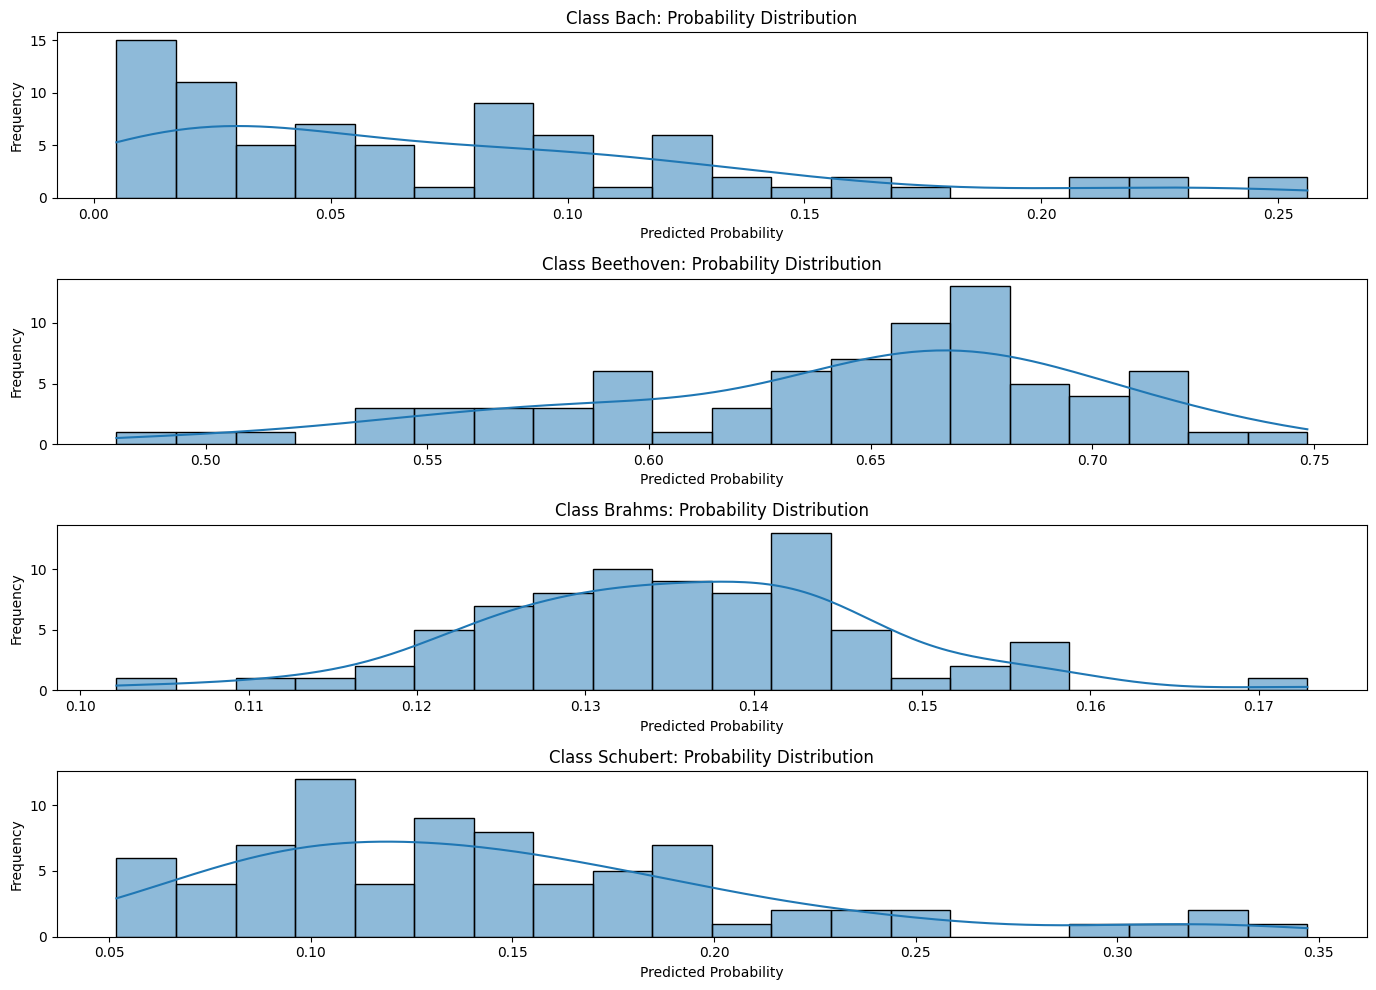

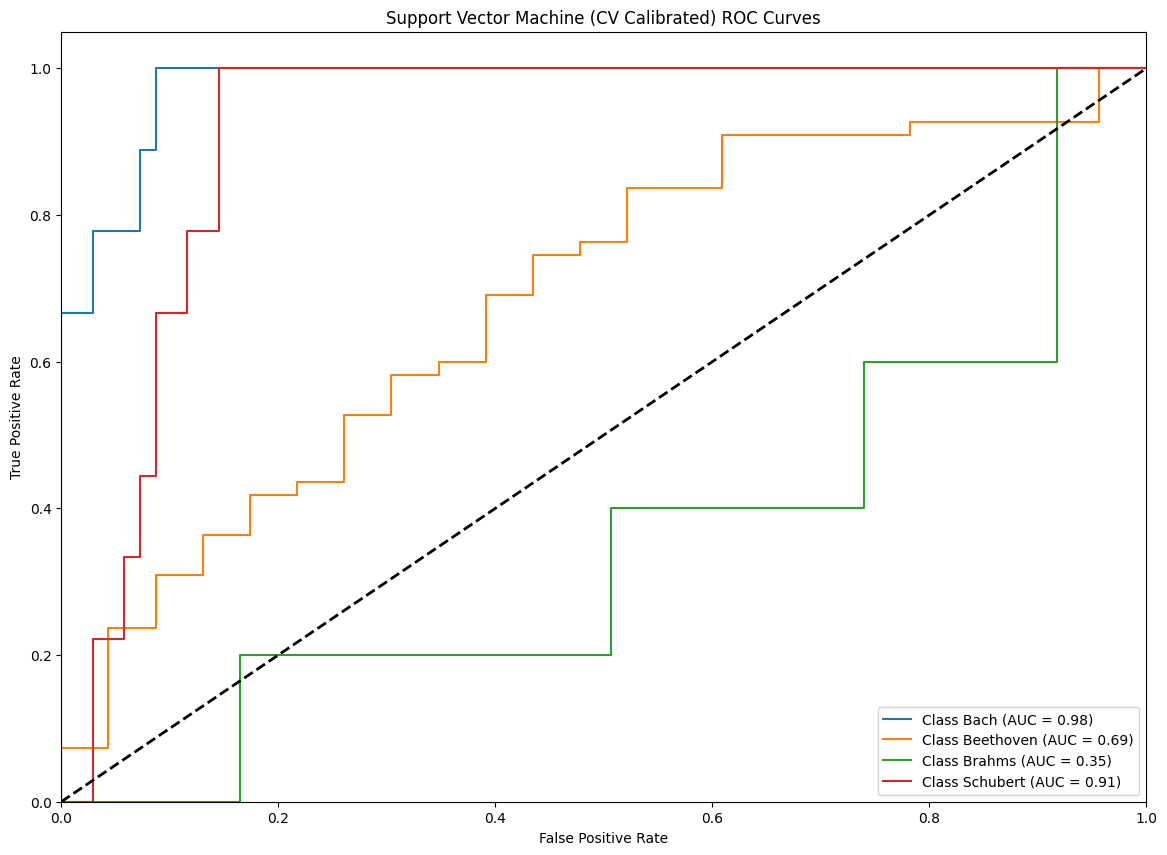

In [30]:
model_eval("Support Vector Machine (CV Calibrated)", y_test, y_pred_svc, y_proba_svc, label_encoder_composer)

### Random Forest

In [31]:
# Build and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
# Predict the target on the test set
y_pred_rf = rf_classifier.predict(X_test)
# Get the classification probabilities for each class
y_proba_rf = rf_classifier.predict_proba(X_test)

Random Forest :
Accuracy Score: 0.8076923076923077

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.82      1.00      0.90        55
           2       0.33      0.20      0.25         5
           3       0.75      0.33      0.46         9

    accuracy                           0.81        78
   macro avg       0.73      0.49      0.56        78
weighted avg       0.80      0.81      0.78        78



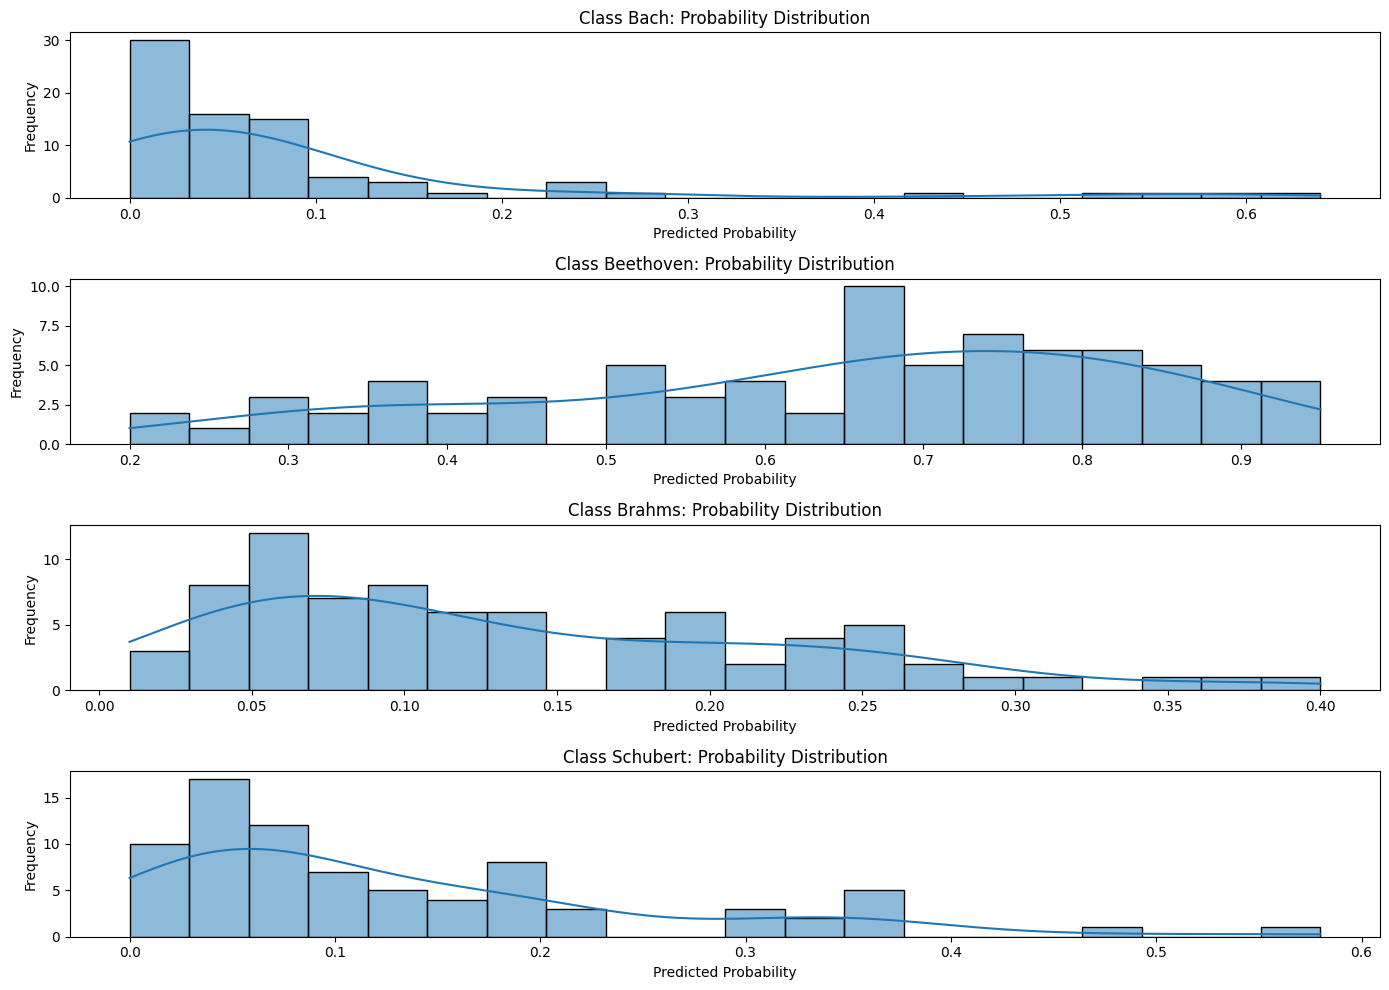

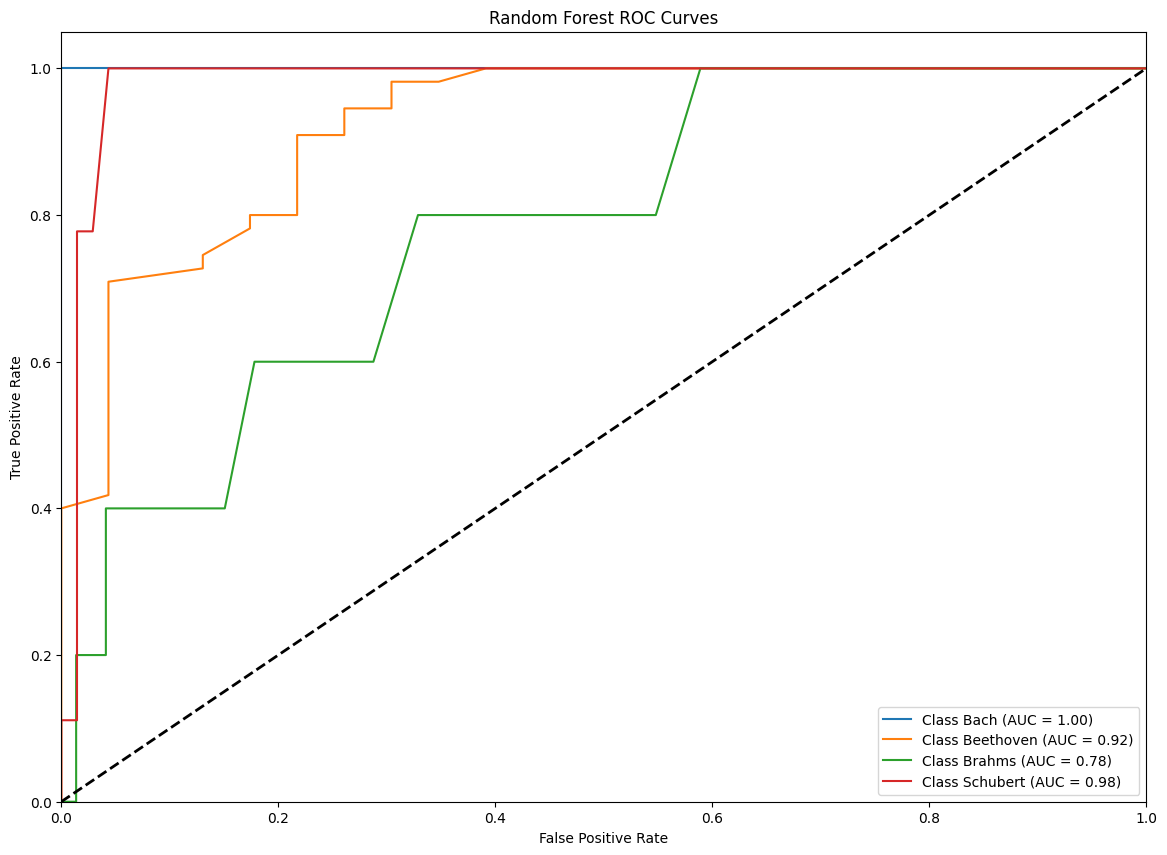

In [32]:
model_eval("Random Forest", y_test, y_pred_rf, y_proba_rf, label_encoder_composer)

### GBM

In [33]:
# Build and train the Random Forest classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
# Predict the target on the test set
y_pred_gb = gb_classifier.predict(X_test)
# Get the classification probabilities for each class
y_proba_gb = gb_classifier.predict_proba(X_test)

GBM :
Accuracy Score: 0.8846153846153846

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.93      0.95      0.94        55
           2       0.50      0.40      0.44         5
           3       0.75      1.00      0.86         9

    accuracy                           0.88        78
   macro avg       0.79      0.75      0.76        78
weighted avg       0.89      0.88      0.88        78



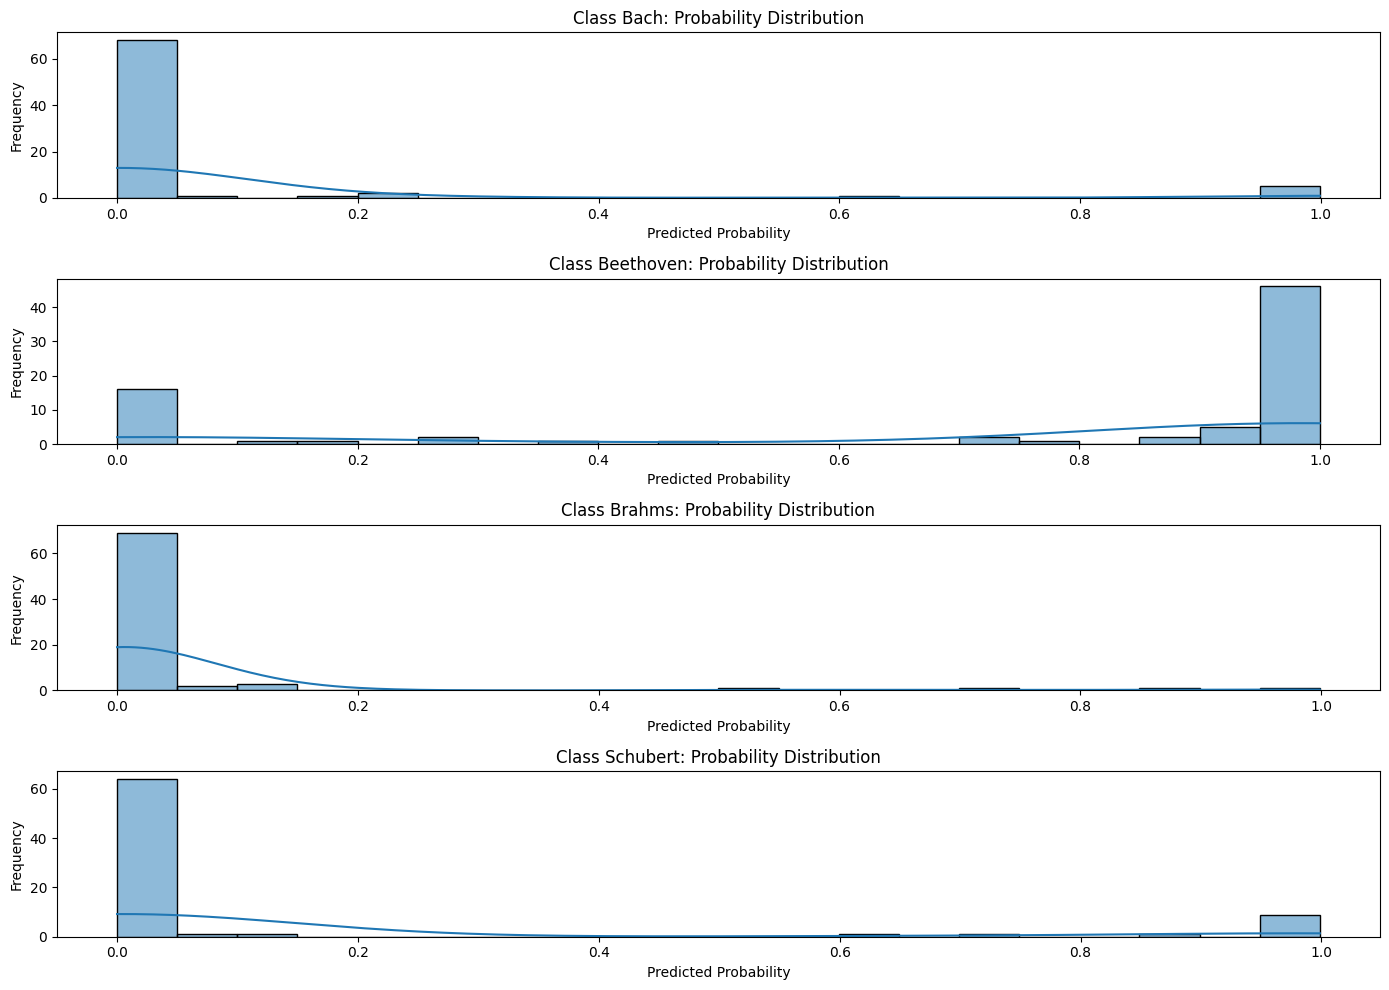

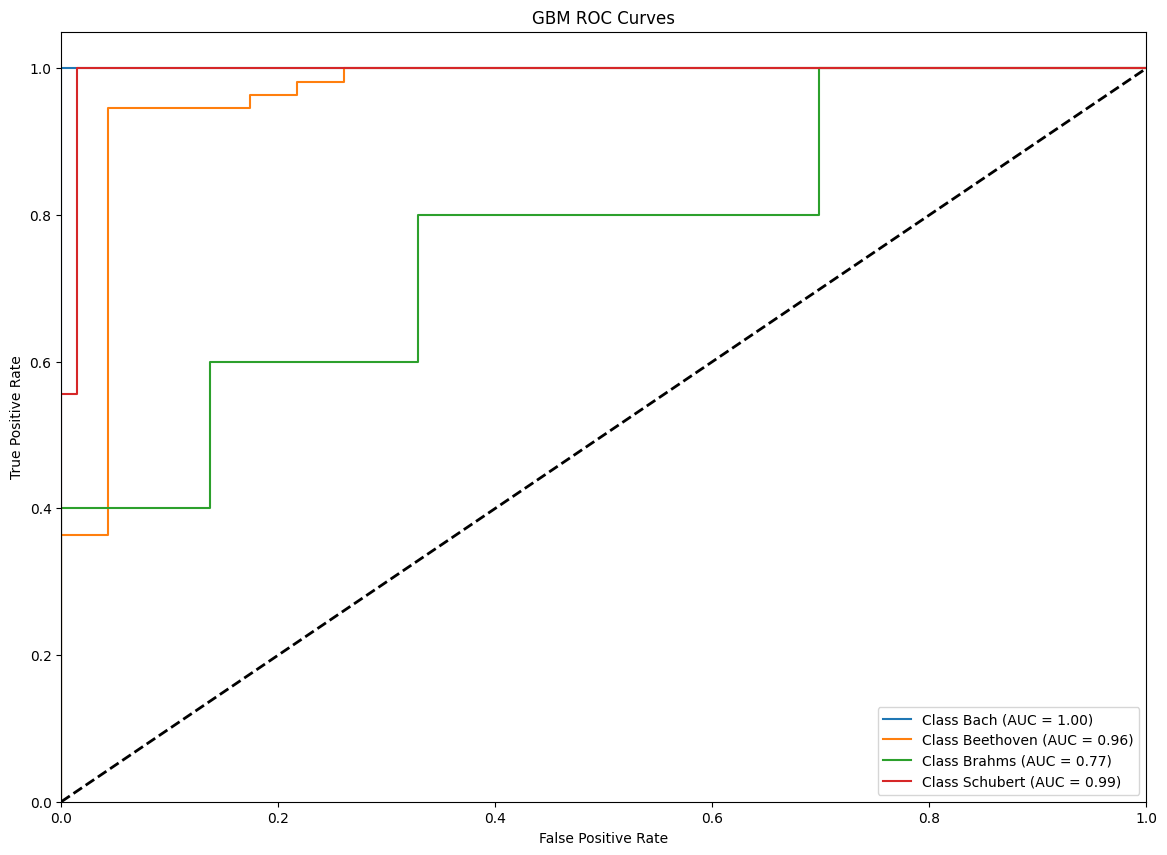

In [34]:
model_eval("GBM", y_test, y_pred_gb, y_proba_gb, label_encoder_composer)

## Inference: Unlabeled

In [35]:
# Predict the target on the test set
y_pred_unlabeled = gb_classifier.predict(z)
# Get the classification probabilities for each class
y_proba_unlabeled = gb_classifier.predict_proba(z)

In [36]:
print(y_pred_unlabeled)
print(label_encoder_composer.inverse_transform(y_pred_unlabeled))
# print(y_proba_unlabeled)

[2 3 3 1 0 1 1 1 1 1 1 1 3 0 1 0 1 2 1 3 1 1 0 1 3 1 1 1 1 3 1 1 3 1 1]
['Brahms' 'Schubert' 'Schubert' 'Beethoven' 'Bach' 'Beethoven' 'Beethoven'
 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven' 'Schubert'
 'Bach' 'Beethoven' 'Bach' 'Beethoven' 'Brahms' 'Beethoven' 'Schubert'
 'Beethoven' 'Beethoven' 'Bach' 'Beethoven' 'Schubert' 'Beethoven'
 'Beethoven' 'Beethoven' 'Beethoven' 'Schubert' 'Beethoven' 'Beethoven'
 'Schubert' 'Beethoven' 'Beethoven']


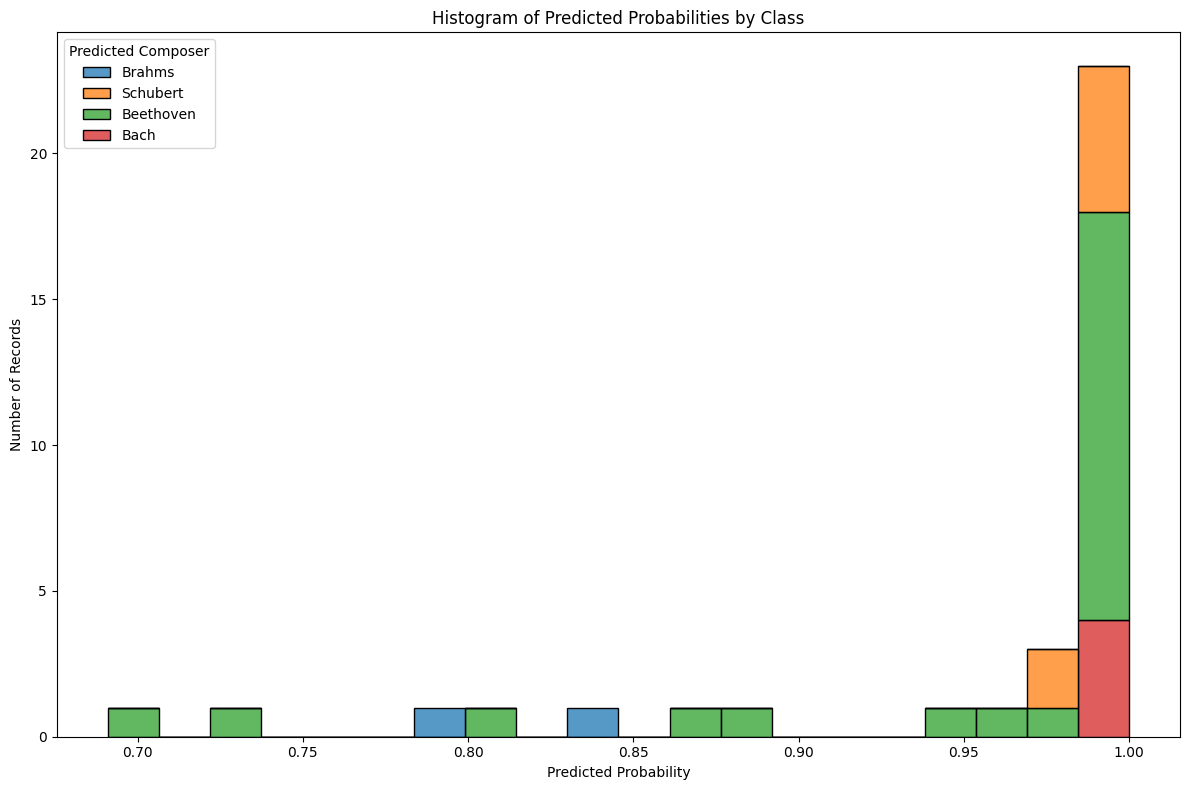

In [37]:
# Prepare the data for plotting
df_plot = pd.DataFrame(y_proba_unlabeled, columns=[f'Class_{i}_prob' for i in range(y_proba_unlabeled.shape[1])])
df_plot['Predicted_Class'] = y_pred_unlabeled
df_plot['Predicted Composer'] = label_encoder_composer.inverse_transform(y_pred_unlabeled)

# Extract the highest predicted probability for each record
df_plot['Max_Probability'] = df_plot[[f'Class_{i}_prob' for i in range(y_proba_unlabeled.shape[1])]].max(axis=1)

# Plot the histogram
plt.figure(figsize=(12, 8))
sns.histplot(data=df_plot, x='Max_Probability', hue='Predicted Composer', multiple='stack', palette='tab10', bins=20)
plt.title('Histogram of Predicted Probabilities by Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.show()

Based on this histogram, we can select a probability threshold such that
```
if max(predicted probability for all classes) < threshold
then midi file is NOT one of the 4 composers in training data
````
To begin, I'd select a threshold of 0.90, resulting in 7 out of the 35 midi files being classified as NOT belonging to our 4 known composers.

In [38]:
df_unlabeled[['filename']].merge(df_plot[df_plot.Max_Probability<0.90],left_index=True, right_index=True, how = 'right').drop(
    labels=['Predicted_Class','Predicted Composer'], axis=1)

,filename,Class_0_prob,Class_1_prob,Class_2_prob,Class_3_prob,Max_Probability
0,0.8014751784512073_adj.mid,0.000411,0.195544,0.792814,0.011231,0.792814
5,0.3559970176888735_adj.mid,0.000019,0.729228,0.269875,0.000878,0.729228
7,0.905499891236923_adj.mid,0.095389,0.867002,0.036828,0.000781,0.867002
17,0.26551079719260606_adj.mid,0.000200,0.162781,0.831555,0.005464,0.831555
18,0.647959423719129_adj.mid,0.291293,0.691016,0.006289,0.011402,0.691016
20,0.10222964826466285_adj.mid,0.092499,0.888018,0.005623,0.013860,0.888018
28,0.1960551158929671_adj.mid,0.046647,0.809037,0.142419,0.001897,0.809037


### How we would operationalize/functionalize

# scratch

In [39]:
file_path_ps2 = test_midi_path+"0.981087291054314_adj.mid"
file_path_ps1 = train_midi_path+"Bach/Cello Suite 3_BWV1009_2217_cs3-1pre.mid"

In [40]:
x = extract_features_from_midi(file_path_ps1)